<a href="https://colab.research.google.com/github/foramirez50/CDA/blob/main/quiz3CDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
!pip install pandas
!pip install wget
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import wget
import zipfile

import matplotlib.pyplot as plt
%matplotlib inline

from pandas_profiling import ProfileReport
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input, Reshape
from keras import backend as K
from keras import applications
from keras.utils.vis_utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge

## DESCARGANDO Y LEYENDO LOS DATOS

In [283]:
descarga_test=wget.download('https://raw.githubusercontent.com/foramirez50/CDA/main/insurance.csv')

In [284]:
df_train = pd.read_csv('/content/insurance.csv', sep=',')
print('Las columnas del dataset son:',df_train.columns)
print('La forma del dataset es: ',df_train.shape)
print('Los tipos de datos del dataset son: ', df_train.dtypes)

Las columnas del dataset son: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
La forma del dataset es:  (1338, 7)
Los tipos de datos del dataset son:  age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [285]:
df_train.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [286]:
ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## TRANSFORMACIÓN DE LOS DATOS

In [287]:
df_train['sex'] = df_train['sex'].astype("category")
df_train['smoker'] = df_train['smoker'].astype("category")
df_train['region'] = df_train['region'].astype("category")

paso todas las variables a categorical

In [288]:
df_train['sex'].replace(['male', 'female'], [0, 1], inplace=True)
df_train['smoker'].replace(['no', 'yes'], [0, 1], inplace=True)


In [289]:
df_train['region'].unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [290]:
df_train['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'], [0, 1, 2, 3], inplace=True)

In [291]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [292]:
df_train.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


In [293]:
map= df_train.corr()
map.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


## REGRESION LINEAL

In [294]:
Y = df_train['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [295]:
df_train.drop(['charges'], axis=1, inplace=True)
X = df_train
X.head(10)

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
5,31,1,25.740,0,0,1
6,46,1,33.440,1,0,1
7,37,1,27.740,3,0,2
8,37,0,29.830,2,0,3
9,60,1,25.840,0,0,2


In [296]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 33)
y_train

1219     7537.16390
162     10450.55200
196      5649.71500
673      6185.32080
923      4320.41085
           ...     
1225     4795.65680
658     26392.26029
578      9724.53000
391      2138.07070
1044    11394.06555
Name: charges, Length: 1070, dtype: float64

In [297]:
scaler = StandardScaler()

In [298]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
y_train_s = y_train 
y_test_s = y_test 
y_train_s

1219     7537.16390
162     10450.55200
196      5649.71500
673      6185.32080
923      4320.41085
           ...     
1225     4795.65680
658     26392.26029
578      9724.53000
391      2138.07070
1044    11394.06555
Name: charges, Length: 1070, dtype: float64

In [299]:
lin_reg=LinearRegression()
lin_reg.fit(x_train_s,y_train_s)

LinearRegression()

In [300]:
lin_reg.intercept_, lin_reg.coef_

(13393.167196307475,
 array([3588.32659976,  198.44269731, 2092.99388874,  636.92861492,
        9862.9751128 ,  524.84669833]))

In [301]:
sgd_reg = SGDRegressor(max_iter = 500, tol= 0.005, penalty=None, eta0 = 0.01, n_iter_no_change=100, random_state = 33)

In [302]:
sgd_reg.fit(x_train_s,y_train.ravel())

SGDRegressor(max_iter=500, n_iter_no_change=100, penalty=None, random_state=33,
             tol=0.005)

In [303]:
preds_train = lin_reg.predict(x_train_s)
preds_test = lin_reg.predict(x_test_s)

In [304]:
mean_absolute_error(y_train_s, preds_train), mean_absolute_error(y_test_s, preds_test)

(4170.741882986528, 4166.256013210668)

In [305]:
(y_test_s - preds_test).describe(percentiles = [.25, .5, .75, .95, .99])

count      268.000000
mean       -91.063936
std       6131.573380
min     -11600.907672
25%      -2729.583261
50%       -902.231132
75%       1484.633615
95%      13447.231922
99%      20164.089139
max      23836.019284
Name: charges, dtype: float64

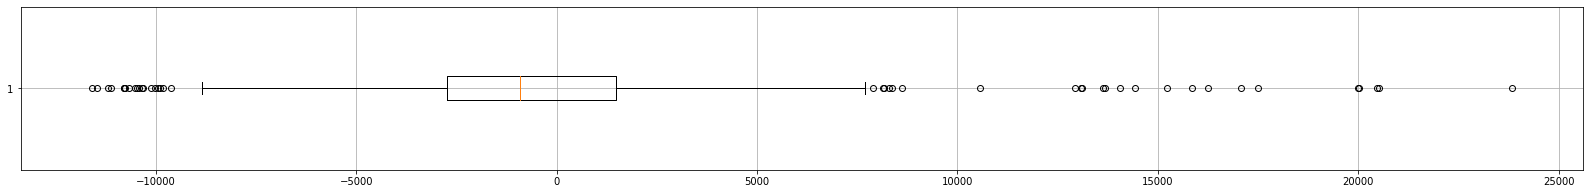

In [306]:
plt.figure(figsize = (28, 3))
plt.boxplot((y_test_s - preds_test), vert = False)
plt.grid()
plt.show()

In [307]:
y_train.max()

63770.42801

## RESPUESTA DEL PUNTO A

i. ¿Es aceptable el error obtenido? RTA: Dado que el máximo es USD 63770.42 y la el error absoluto comparado con el test me dio USD 4166.25, está dentro del 0.06. En cuanto a la media del predecido con el test dio usd -91, que es una media relativamente pequeña, teniendo en cuenta los valores de Y.


ii. ¿Hay evidencia de overfitting? RTA: No, pues los datos del train y el test dieron parecido

## POLINOMIAL

In [308]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 33)


In [309]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)
y_train_s = y_train 
y_test_s = y_test 
y_train_s


1219     7537.16390
162     10450.55200
196      5649.71500
673      6185.32080
923      4320.41085
           ...     
1225     4795.65680
658     26392.26029
578      9724.53000
391      2138.07070
1044    11394.06555
Name: charges, Length: 1070, dtype: float64

Regularización Ridge de 2 grados

In [310]:
#polinomial de 2 grados
poly_reg2=PolynomialFeatures(degree=2, include_bias=False)
x_poly2=poly_reg2.fit_transform(x_train_s)
print(x_train_s[0])
print(x_poly2[0])

[-0.07275597  1.02077653 -0.08803997  1.61345135 -0.51601569  0.4686641 ]
[-0.07275597  1.02077653 -0.08803997  1.61345135 -0.51601569  0.4686641
  0.00529343 -0.07426758  0.00640543 -0.11738821  0.03754322 -0.03409811
  1.04198473 -0.08986914  1.64697328 -0.5267367   0.47840131  0.00775104
 -0.14204821  0.04543001 -0.04126117  2.60322526 -0.83256621  0.75616672
  0.26627219 -0.24183803  0.21964603]


In [311]:
#polinomial de 4 grados
poly_reg4=PolynomialFeatures(degree=4, include_bias=False)
x_poly4=poly_reg4.fit_transform(x_train_s)
print(x_train_s[0])
print(x_poly4[0])

[-0.07275597  1.02077653 -0.08803997  1.61345135 -0.51601569  0.4686641 ]
[-7.27559678e-02  1.02077653e+00 -8.80399696e-02  1.61345135e+00
 -5.16015687e-01  4.68664095e-01  5.29343085e-03 -7.42675846e-02
  6.40543319e-03 -1.17388214e-01  3.75432207e-02 -3.40981098e-02
  1.04198473e+00 -8.98691351e-02  1.64697328e+00 -5.26736705e-01
  4.78401311e-01  7.75103625e-03 -1.42048208e-01  4.54300054e-02
 -4.12611727e-02  2.60322526e+00 -8.32566207e-01  7.56166717e-01
  2.66272189e-01 -2.41838025e-01  2.19646034e-01 -3.85128684e-04
  5.40341000e-03 -4.66033491e-04  8.54069315e-03 -2.73149336e-03
  2.48084098e-03 -7.58106077e-02  6.53851590e-03 -1.19827135e-01
  3.83232387e-02 -3.48065504e-02 -5.63934144e-04  1.03348548e-02
 -3.30530401e-03  3.00199655e-03 -1.89400173e-01  6.05741602e-02
 -5.50156413e-02 -1.93728908e-02  1.75951596e-02 -1.59805598e-02
  1.06363356e+00 -9.17363042e-02  1.68119167e+00 -5.37680468e-01
  4.88340832e-01  7.91207592e-03 -1.44999477e-01  4.63738835e-02
 -4.21184369e-02

In [312]:
x_poly2_train = poly_reg2.fit_transform(x_train_s)
x_poly4_train = poly_reg4.fit_transform(x_train_s)

In [313]:
x_poly2_test = poly_reg2.fit_transform(x_test_s)
x_poly4_test = poly_reg4.fit_transform(x_test_s)

In [314]:
ridge_reg1 = Ridge(alpha=0.1, solver='cholesky')
ridge_reg1.fit(x_poly2_train,y_train)

ridge_reg2 = Ridge(alpha=0.5, solver='cholesky')
ridge_reg2.fit(x_poly2_train,y_train)

ridge_reg3 = Ridge(alpha=0.8, solver='cholesky')
ridge_reg3.fit(x_poly2_train,y_train)

ridge_reg4 = Ridge(alpha=0.1, solver='cholesky')
ridge_reg4.fit(x_poly4_train,y_train)

ridge_reg5 = Ridge(alpha=0.5, solver='cholesky')
ridge_reg5.fit(x_poly4_train,y_train)

ridge_reg6 = Ridge(alpha=0.8, solver='cholesky')
ridge_reg6.fit(x_poly4_train,y_train)


Ridge(alpha=0.8, solver='cholesky')

In [315]:
poly_pred_train1 = ridge_reg1.predict(x_poly2_train)
poly_pred_test1 = ridge_reg1.predict(x_poly2_test)

poly_pred_train2 = ridge_reg2.predict(x_poly2_train)
poly_pred_test2 = ridge_reg2.predict(x_poly2_test)

poly_pred_train3 = ridge_reg3.predict(x_poly2_train)
poly_pred_test3 = ridge_reg3.predict(x_poly2_test)

poly_pred_train4 = ridge_reg4.predict(x_poly4_train)
poly_pred_test4 = ridge_reg4.predict(x_poly4_test)

poly_pred_train5 = ridge_reg5.predict(x_poly4_train)
poly_pred_test5 = ridge_reg5.predict(x_poly4_test)

poly_pred_train6 = ridge_reg6.predict(x_poly4_train)
poly_pred_test6 = ridge_reg6.predict(x_poly4_test)

In [316]:
# con polinomio grado 2
print('La media de error absoluto con alpha = 0.1 es:', mean_absolute_error(y_train_s, poly_pred_train1), mean_absolute_error(y_test_s, poly_pred_test1))
print('La media de error absoluto con alpha = 0.5 es:', mean_absolute_error(y_train_s, poly_pred_train2), mean_absolute_error(y_test_s, poly_pred_test2))
print('La media de error absoluto con alpha = 0.8 es:', mean_absolute_error(y_train_s, poly_pred_train3), mean_absolute_error(y_test_s, poly_pred_test3))


La media de error absoluto con alpha = 0.1 es: 2845.8275967980426 2887.3346927406724
La media de error absoluto con alpha = 0.5 es: 2846.1286070912115 2887.5605494724628
La media de error absoluto con alpha = 0.8 es: 2846.3543291944634 2887.7299360031725


In [317]:
# con polinomio grado 4
print('La media de error absoluto con alpha = 0.1 es:', mean_absolute_error(y_train_s, poly_pred_train4), mean_absolute_error(y_test_s, poly_pred_test4))
print('La media de error absoluto con alpha = 0.5 es:', mean_absolute_error(y_train_s, poly_pred_train5), mean_absolute_error(y_test_s, poly_pred_test5))
print('La media de error absoluto con alpha = 0.8 es:', mean_absolute_error(y_train_s, poly_pred_train6), mean_absolute_error(y_test_s, poly_pred_test6))


La media de error absoluto con alpha = 0.1 es: 2580.614655339343 3366.3043284494734
La media de error absoluto con alpha = 0.5 es: 2579.8322279637723 3364.19339022489
La media de error absoluto con alpha = 0.8 es: 2579.260170938574 3362.6210117753694


In [318]:
print('Error con polinomio 2, alpha 0.1', (y_test_s - poly_pred_test1).describe())
print('Error con polinomio 2, alpha 0.5', (y_test_s - poly_pred_test2).describe())
print('Error con polinomio 2, alpha 0.8', (y_test_s - poly_pred_test3).describe())

Error con polinomio 2, alpha 0.1 count      268.000000
mean       -26.410275
std       4889.269999
min      -8638.484341
25%      -1744.204870
50%      -1232.064438
75%       -525.949480
max      21784.929539
Name: charges, dtype: float64
Error con polinomio 2, alpha 0.5 count      268.000000
mean       -26.478021
std       4889.142877
min      -8631.705087
25%      -1745.964311
50%      -1232.341896
75%       -527.672296
max      21782.164658
Name: charges, dtype: float64
Error con polinomio 2, alpha 0.8 count      268.000000
mean       -26.528820
std       4889.048313
min      -8626.624309
25%      -1747.282726
50%      -1232.266793
75%       -528.963783
max      21780.092567
Name: charges, dtype: float64


In [319]:
print('Error con polinomio 4, alpha 0.1', (y_test_s - poly_pred_test4).describe())
print('Error con polinomio 4, alpha 0.5', (y_test_s - poly_pred_test5).describe())
print('Error con polinomio 4, alpha 0.8', (y_test_s - poly_pred_test6).describe())

Error con polinomio 4, alpha 0.1 count      268.000000
mean      -235.988684
std       5463.924507
min     -14298.118938
25%      -2482.455380
50%      -1075.945083
75%        118.667956
max      21079.091596
Name: charges, dtype: float64
Error con polinomio 4, alpha 0.5 count      268.000000
mean      -235.810000
std       5462.151972
min     -14288.171732
25%      -2480.009343
50%      -1078.188409
75%        117.772901
max      21086.386737
Name: charges, dtype: float64
Error con polinomio 4, alpha 0.8 count      268.000000
mean      -235.676432
std       5460.835649
min     -14280.758998
25%      -2478.203171
50%      -1077.843620
75%        115.995164
max      21091.777058
Name: charges, dtype: float64


## RESPUESTA DEL PUNTO B

i. ¿Fue posible mejorar el error?¿Qué hiper-parámetros tiene el modelo que produce el menor error?

Si fue posible mejorar el error en comparación con el modelo linear, el modelo que produce el menor error tiene un polinomio grado2 con un alpha= 0.1 con una media del error de -26.41


ii. ¿Qué atributos parecen ser los más importantes para realizar la predicción?

Como se puede ver en la gráfica, los atributos más importantes son los que tienen alta correlación positiva con los "charges", por esta razón los atributos más importantes en orden son:

1. fumador con una correlación del 0.78
2. Edad con una correlación de 0.29
3. el BMI con una correlación del 0.19

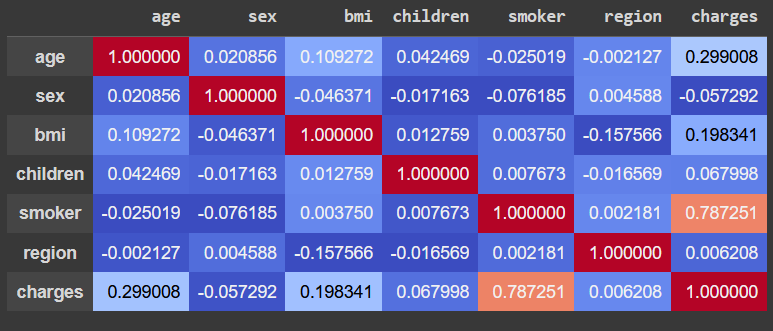

